## Events Analysis
## Financial Crisis

This notebook looks at changes around 2008 Financial Crisis.

### Import packages and load data

In [1]:
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud_2020

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import nltk
import seaborn as sns

import os #For looking through files
import os.path #For managing file paths

from ast import literal_eval
import source.helper_functions as helper

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# load corpus
file = 'total_trans_normalized.csv'
tal_df = pd.read_csv(file, converters = helper.converters)

In [113]:
tal_df.head()

,ep_num,ep_title,year,url,act_name,text,tokenized_sents,no_lemma_normalized_sents,normalized_sents,tokenized_text,normalized_tokens,no_lemma_normalized_tokens
0,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act Four: Act Four,This is Your Radio Playhouse. I'm Ira Glass. O...,"[[This, is, Your, Radio, Playhouse], [I, 'm, I...","[[radio, playhouse], [m, ira, glass], [ok, rig...","[[radio, playhouse], [be, ira, glass], [okay, ...","[This, is, Your, Radio, Playhouse, I, 'm, Ira,...","[radio, playhouse, be, ira, glass, okay, right...","[radio, playhouse, m, ira, glass, ok, right, r..."
1,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act Three: Act Three,"Well, next on our little playhouse stage, we h...","[[Well, next, on, our, little, playhouse, stag...","[[little, playhouse, stage, mr, lawrence, steg...","[[little, playhouse, stage, mr, lawrence, steg...","[Well, next, on, our, little, playhouse, stage...","[little, playhouse, stage, mr, lawrence, stege...","[little, playhouse, stage, mr, lawrence, stege..."
2,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act Two: Act Two,"Good morning. Glass, Jacobson & Associates.Hey...","[[Good, morning], [Glass, Jacobson, Associates...","[[good, morning], [glass, jacobson, associates...","[[good, morning], [glass, jacobson, associate]...","[Good, morning, Glass, Jacobson, Associates, H...","[good, morning, glass, jacobson, associate, he...","[good, morning, glass, jacobson, associates, h..."
3,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act One: Act One,"All right, Your Radio Playhouse. All right. I'...","[[All, right, Your, Radio, Playhouse], [All, r...","[[right, radio, playhouse], [right], [m, makin...","[[right, radio, playhouse], [right], [be, make...","[All, right, Your, Radio, Playhouse, All, righ...","[right, radio, playhouse, right, be, make, eye...","[right, radio, playhouse, right, m, making, ey..."
4,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Prologue,"Joe Franklin?I'm ready.It's Ira Glass here.Oh,...","[[Joe, Franklin?I'm, ready], [It, 's, Ira, Gla...","[[joe, franklin?i'm, ready], [ira, glass], [oh...","[[joe, franklin?i'm, ready], [ira, glass], [oh...","[Joe, Franklin?I'm, ready, It, 's, Ira, Glass,...","[joe, franklin?i'm, ready, ira, glass, oh, emc...","[joe, franklin?i'm, ready, ira, glass, oh, emc..."


## Event 2: Financial Crisis

### First, split it up by year
before = 2005, 2006, 2007

after = 2008, 2009, 2010

In [4]:
before = [2005, 2006, 2007]
after = [2008, 2009, 2010]
before_df = tal_df[tal_df['year'].isin(before)]
after_df = tal_df[tal_df['year'].isin(after)]
by_year = {}
for year in before + after:
    by_year[year] = tal_df[tal_df['year'] == year]

## Subject/object for verbs

In [17]:
pre = helper.make_verb_dict('hate', before_df)
pre

{'2005': (['who',
   'farmers',
   'I',
   'I',
   'Collin',
   'I',
   'I',
   'People',
   'I',
   'you',
   'you',
   'I',
   'I',
   'people',
   'You',
   'they'],
  ['them',
   'Hawks',
   'country',
   'him',
   'customer',
   'dogs',
   'me',
   'me',
   'them',
   'sports',
   'soccer',
   'soccer',
   'States',
   'you',
   'us']),
 '2006': (['I',
   'people',
   'they',
   'they',
   'I',
   'I',
   'I',
   'who',
   'they',
   'Muslims'],
  ['Americans',
   'SOUL',
   'SOUL',
   'it',
   'someone',
   'her',
   'her',
   'her',
   'you',
   'us']),
 '2007': (['daughter',
   'I',
   'I',
   'she',
   'I',
   'I',
   'I',
   'I',
   'I',
   'They',
   'I',
   'I',
   'I',
   'I',
   'I'],
  ['me', 'life', 'me', 'you', 'man', 'Iran', 'classes', 'friend'])}

In [21]:
post = helper.make_verb_dict('hate', after_df)
post

{'2008': (['I',
   'I',
   'I',
   'you',
   'you',
   'I',
   'I',
   'she',
   'I',
   'We',
   'We',
   'we',
   'I',
   'I',
   'I',
   'I',
   'I',
   'banks',
   'institutions',
   'I',
   'people',
   'us',
   'you',
   'I',
   'You'],
  ['him',
   'word',
   'article',
   'wall',
   'daughter',
   'him',
   'stereotypes',
   'them',
   'Muslims',
   'country',
   'it',
   'idea',
   'idea',
   'idea',
   'you',
   'Russians',
   'people']),
 '2009': (['you',
   'I',
   'Everyone',
   'I',
   'I',
   'They',
   'I',
   'I',
   'I',
   'I',
   'I',
   'you',
   'I',
   'you',
   'people',
   'lawyers',
   'You',
   'I',
   'We',
   'you',
   'they',
   'lot',
   'I',
   'you',
   'I',
   'you',
   'I',
   'People'],
  ['him',
   'him',
   'him',
   'it',
   'nationalization',
   'folks',
   'what',
   'name',
   'what',
   'name',
   'me',
   'Citigroup',
   'lawyers',
   'Poof',
   'family',
   'catalyst',
   'it',
   'insurers',
   'copays',
   'you',
   'me',
   'day',
   'day

In [22]:
feel_pre = helper.make_verb_dict('feel', before_df)
feel_pre

{'2005': (['you',
   'I',
   'I',
   'you',
   'I',
   'we',
   'us',
   'them',
   'you',
   'me',
   'you',
   'I',
   'you',
   'you',
   'I',
   'editors',
   'her',
   'me',
   'I',
   'I',
   'I',
   'I',
   'you',
   'I',
   'you',
   'you',
   'He',
   'they',
   'him',
   'me',
   'I',
   'you',
   'I',
   'me',
   'I',
   'I',
   'I',
   'parents',
   'I',
   'father',
   'you',
   'I',
   'you',
   'I',
   'you',
   'me',
   'I',
   'I',
   'I',
   'I',
   'I',
   'I',
   'husband',
   'I',
   'I',
   'myself',
   'you',
   'I',
   'I',
   'I',
   'You',
   'I',
   'you',
   'I',
   'I',
   'I',
   'I',
   'you',
   'you',
   'me',
   'I',
   'you',
   'you',
   'you',
   'me',
   'I',
   'you',
   'I',
   'I',
   'I',
   'I',
   'I',
   'I',
   'You',
   'guys',
   'me',
   'you',
   'me',
   'me',
   'you',
   'I',
   'I',
   'I',
   'I',
   'me',
   'me',
   'they',
   'I',
   'people',
   'I',
   'I',
   'you',
   'you',
   'I',
   'you',
   'I',
   'I',
   'you',
   'I'

In [23]:
feel_post = helper.make_verb_dict('feel', after_df)
feel_post

{'2008': (['us',
   'You',
   'I',
   'you',
   'we',
   'they',
   'they',
   'I',
   'I',
   'I',
   'I',
   'It',
   'who',
   'me',
   'I',
   'me',
   'you',
   'I',
   'you',
   'I',
   'me',
   'you',
   'house',
   'I',
   'they',
   'we',
   'you',
   'You',
   'I',
   'parents',
   'Davidson',
   'I',
   'you',
   'you',
   'you',
   'I',
   'I',
   'she',
   'I',
   'I',
   'I',
   'you',
   'I',
   'You',
   'somebody',
   'they',
   'you',
   'me',
   'I',
   'They',
   'someone',
   'I',
   'He',
   'I',
   'You',
   'years',
   'it',
   'them',
   'I',
   'you',
   'you',
   'I',
   'I',
   'me',
   'she',
   'mom',
   'you',
   'we',
   'he',
   'I',
   'he',
   'I',
   'I',
   'I',
   'I',
   'me',
   'them',
   'you',
   'you',
   'I',
   'you',
   'you',
   'you',
   'you',
   'I',
   'I',
   'I',
   'you',
   'I',
   'everybody',
   'who',
   'I',
   'it',
   'me',
   'you',
   'me',
   'People',
   'you',
   'I',
   'I',
   'I',
   'I',
   'I',
   'him',
   'me',
 

## Get common_contexts across years for a particular words

In [39]:
# words of interest for this event
word1 = ['security', 'secure', 'money', 'financial', 'crisis',
         'bank', 'debt', 'rate', 'bailout', 'government', 'loan',
         'mortgage', 'panic', 'banking', 'housing', 'finances']
word2 = ['love', 'america', 'american', 'country', 'safe', 'family', 'home']

In [137]:
financial_home_contexts = helper.agg_contexts(list(by_year.values()),
                                              before + after, word1+word2)

In [139]:
financial_home_contexts

,security,secure,money,financial,crisis,bank,debt,rate,bailout,government,...,housing,finances,love,america,american,country,safe,family,home,year
0,"[(basically, stability), (year, situation), (g...","[(quote, people), (feel, afraid), (feel, fbi),...","[(collect, money), (money, poor), (extra, week...","[(need, aid), (school, aid)]","[(real, mom), (real, real), (social, cambodia)]","[(west, volunteering), (store, account), (went...","[(got, city), (long, saves), (gone, tried)]","[(crime, soaring), (crime, fact), (crime, big)...",[],"[(parts, existed), (charge, usaid), (federal, ...",...,"[(robedee, lawyer), (murderer, lawyer), (mainl...",[],"[(iraq, brings), (helicopters, love), (love, p...","[(trip, seen), (people, lot), (rest, lot), (sc...","[(ah, know), (going, forces), (chicago, life),...","[(years, feel), (phase, figured), (arrived, ap...","[(yeah, wait), (men, joe), (look, atmosphere),...","[(house, talked), (got, going), (save, win), (...","[(iraq, wbez), (good, relax), (job, yeah), (wa...",2005
1,"[(hours, guards), (young, guard), (little, boo...",[],"[(pool, $), (everybody, reason), (going, katie...","[(wife, problems), (reassuring, mess), (crises...","[(aids, promise)]","[(money, small), (copy, statement), (letters, ...",[],"[(death, gone)]",[],"[(regard, rules), (federal, like), (federal, r...",...,"[(public, projects), (department, urban), (big...",[],"[(yeah, instinct), (ve, fact), (zharov, radica...","[(morning, actually), (morning, davy), (mrs, m...","[(*START*, life), (chicago, life), (programs, ...","[(folks, found), (stuff, world), (stations, ta...","[(think, assume), (love, dad), (feel, house), ...","[(makes, suffering), (talking, acknowledge), (...","[(got, messages), (chick, brooklyn), (like, ni...",2006
2,"[(peter, camera), (couple, guards), (need, sta...","[(held, room)]","[(knew, coming), (coming, basically), (got, pr...","[(handled, crime), (microwaves, account), (uni...","[(midst, desperate), (kind, like), (knows, fin...","[($, buy), (attorney, account), (credit, texas...","[(worth, house), ($, oh), (let, happen), (deep...","[(mortality, pilgrims), (incidentals, m), (sec...",[],"[(average, ministry), (blocked, united), (stat...",...,"[(finding, ready), (public, complex)]","[(lay, paying), (like, break), (candid, major)]","[(time, beer), (audiences, point), (think, it-...","[(weight, probably), (little, comes), (returni...","[(chicago, life), (south, cattle), (continues,...","[(smuggle, care), (like, sort), (half, vote), ...","[(totally, wander--), (clever, city), (relativ...","[(expect, member), (feel, prayers), (percentil...","[(going, care), (media, reply), (came, work), ...",2007
3,"[(corporate, consultant), (national, purposes)...","[(clear, coming), (money, main), (rushed, room)]","[(offer, illegal), (tell, years), (sir, sir), ...","[(working, services), (awards, securities), (g...","[(mortgage, time), (credit, gave), (mortgage, ...","[(dad, account), (personal, account), (like, a...","[(collateralized, obligation), (went, late), (...","[(month, decades), (adjustable, recently), (re...","[(crisis, fannie), (step, banks), ($, package)...","[(big, institution), (build, funded), (facilit...",...,"[(public, auctioned), (loan, crisis), (crisis,...",[],"[(promise, care), (sure, know), (stranger, joh...","[(flying, divorce), (report, runs), (onion, fe...","[(memoir, life), (met, aid), (chicago, life), ...","[(miriam, week), (countries, easy), (happened,...","[(brother, speaking), (blanket, inch), (bought...","[(said, want), (bad, think), (good, looked), (...","[(wonderful, lied), (coming, round), (going, w...",2008
4,"[(social, allotment), (working, inauguration),...","[(way, tell), (need, chimpanzee)]","[(audience, popularity), (mayor, care), (spend...","[(exotic, instruments), (residing, institution...","[(mortgage, year), (understand, right), (banki...","[(central, fed), (central, raised), (overnight...","[($, pay), (residential, basically), (wipe, al...","[(funds, half), (interest, setting), (lendi

In [141]:
financial_home_contexts.to_csv('financial_common_contexts.csv', index=False)

In [176]:
# count words in contexts
context_counts = helper.count_contexts(list(by_year.values()),
                                       before + after, word1+word2)

In [167]:
context_counts

,security,secure,money,financial,crisis,bank,debt,rate,bailout,government,loan,mortgage,panic,banking,housing,finances,year
0,"{'social': 5, 'homeland': 5, 'national': 3, 'f...","{'feel': 2, 'quote': 1, 'people': 1, 'afraid':...","{'money': 8, 'need': 8, 'lot': 8, 'going': 7, ...","{'aid': 2, 'need': 1, 'school': 1}","{'real': 3, 'mom': 1, 'social': 1, 'cambodia': 1}","{'west': 4, 'like': 2, 'storefront': 2, 'bank'...","{'got': 1, 'city': 1, 'long': 1, 'saves': 1, '...","{'crime': 3, 'soaring': 1, 'fact': 1, 'big': 1...",{},"{'federal': 6, 'christian': 3, 'volunteers': 3...","{'money': 2, 'qualify': 1, 'months': 1, 'bank'...",{},"{'close': 1, 'basically': 1, 'run': 1, 'standi...",{},"{'center': 6, 'lawyer': 2, 'department': 2, 'f...",{},2005
1,"{'booth': 2, 'hours': 1, 'guards': 1, 'young':...",{},"{'going': 4, 'lot': 4, 'people': 4, 'dig': 3, ...","{'wife': 1, 'problems': 1, 'reassuring': 1, 'm...","{'aids': 1, 'promise': 1}","{'west': 5, 'money': 1, 'small': 1, 'copy': 1,...",{},"{'death': 1, 'gone': 1}",{},"{'federal': 4, 'building': 3, 'rules': 2, 'law...",{},"{'paid': 1, 'bungalow': 1, 'statements': 1, 's...","{'remorse': 1, 'instant': 1, 'started': 1, 're...",{},"{'public': 7, 'activists': 3, 'projects': 2, '...",{},2006
2,"{'assessment': 2, 'national': 2, 'security': 2...","{'held': 1, 'room': 1}","{'money': 10, 'lot': 9, 'like': 4, '$': 4, 'co...","{'aid': 3, 'hardship': 2, 'handled': 1, 'crime...","{'like': 2, 'midst': 1, 'desperate': 1, 'kind'...","{'$': 2, 'account': 2, 'buy': 1, 'attorney': 1...","{'deep': 2, 'worth': 1, 'house': 1, '$': 1, 'o...","{'mortality': 1, 'pilgrims': 1, 'incidentals':...",{},"{'work': 3, 'air': 3, 'maliki': 3, 'federal': ...","{'student': 1, 'apply': 1}",{},"{'confuse': 1, 'excitement': 1, 'running': 1, ...","{'borders': 1, 'system': 1}","{'finding': 1, 'ready': 1, 'public': 1, 'compl...","{'lay': 1, 'paying': 1, 'like': 1, 'break': 1,...",2007
3,"{'backed': 5, 'national': 4, 'homeland': 4, 's...","{'clear': 1, 'coming': 1, 'money': 1, 'main': ...","{'pool': 23, 'lot': 14, 'borrow': 14, 'making'...","{'system': 11, 'crisis': 7, 'markets': 5, 'glo...","{'financial': 8, 'mortgage': 7, 'housing': 4, ...","{'like': 8, 'small': 7, 'account': 5, 'money':...","{'like': 2, 'collateralized': 1, 'obligation':...","{'money': 3, 'interest': 3, 'recently': 2, 'fi...","{'plan': 3, 'bill': 3, 'good': 3, 'support': 2...","{'federal': 8, 'want': 4, 'states': 3, 'agency...","{'money': 3, 'imprudent': 3, 'buy': 3, 'nina':...","{'backed': 13, 'crisis': 6, 'state': 5, 'broke...","{'fear': 3, 'state': 1, 'hear': 1, 'start': 1,...","{'system': 4, 'industry': 3, 'housing': 2, 'se...","{'crisis': 4, 'market': 4, 'bubble': 3, 'price...",{},2008
4,"{'backed': 5, 'national': 3, 'chain': 2, 'soci...","{'way': 1, 'tell': 1, 'need': 1, 'chimpanzee': 1}","{'pool': 32, 'lot': 17, 'planet': 12, 'big': 9...","{'products': 9, 'instruments': 4, 'institution...","{'banking': 6, 'housing': 4, 'mortgage': 2, 'r...","{'clark': 21, '$': 13, 'deutsche': 8, 'money':...","{'pay': 2, 'collateralized': 2, '$': 1, 'resid...","{'interest': 5, 'inflation': 3, 'funds': 2, 'l...","{'keeping': 1, 'money': 1}","{'going': 5, 'federal': 5, 'people': 5, 'says'...","{'savings': 5, 'modifications': 5, '$': 4, 'ho...","{'backed': 14, 'payment': 4, 'paid': 4, 'broke...","{'investors': 1, 'pull': 1, 'butler': 1, 'eyes...","{'system': 14, 'crisis': 6, 'joke': 2, 'busine...","{'prices': 6, 'bubble': 5, 'market': 4, 'crisi...","{'prioritization': 1, 'people': 1}",2009
5,"{'backed': 3, 'forces': 2, 'maximum': 2, 'fina...","{'able': 1, 'country': 1, 'try': 1, 'dirty': 1}","{'lot': 14, 'planet': 13, 'going': 10, 'people...","{'crisis': 12, 'system': 8, 'collapse': 2, 'in...","{'financial': 12, 'midlife': 5, 'fiscal': 4, '...","{'$': 3, 'world': 3, 'central': 3, 'investment...","{'card': 2, 'collateralized': 1, 'obligations'...","{'inflation': 3, 'drop': 2, 'dropout': 2, 'wan...","{'history': 1, 'cost': 1, 'government': 1, 'lo...","{'iraqi': 11, 'federal':

In [175]:
for idx in range(len(before + after)):
    print(context_counts.iloc[idx]['financial'])
    print()

OrderedDict([('aid', 2), ('need', 1), ('school', 1)])

OrderedDict([('wife', 1), ('problems', 1), ('reassuring', 1), ('mess', 1), ('crises', 1), ('difficulty', 1)])

OrderedDict([('aid', 3), ('hardship', 2), ('handled', 1), ('crime', 1), ('microwaves', 1), ('account', 1), ('universities', 1), ('tuition', 1), ('type', 1), ('mean', 1), ('businessman', 1), ('plan', 1), ('worth', 1), ('records', 1), ('holidays', 1)])

OrderedDict([('system', 11), ('crisis', 7), ('markets', 5), ('global', 3), ('turmoil', 3), ('institutions', 3), ('mess', 3), ('services', 2), ('sort', 2), ('thing', 2), ('products', 2), ('regulators', 2), ('current', 2), ('working', 1), ('awards', 1), ('securities', 1), ('talking', 1), ('instrument', 1), ('alchemy', 1), ('head', 1), ('engineering', 1), ('specialized', 1), ('techniques', 1), ('non', 1), ('terrorism', 1), ('people', 1), ('involved', 1), ('transactions', 1), ('sounding', 1), ('america', 1), ('upheaval', 1), ('big', 1), ('deal', 1), ('recent', 1), ('risky', 1), (

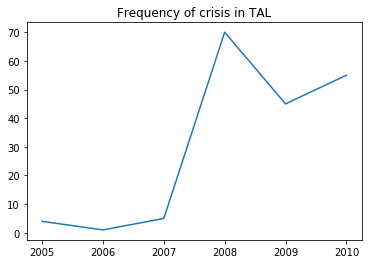

In [145]:
helper.plot_count(tal_df, before + after, 'crisis')

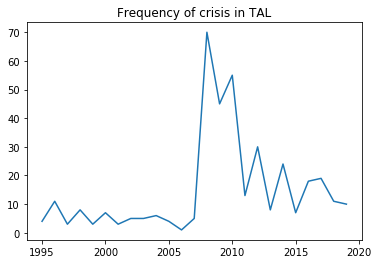

In [155]:
helper.plot_count(tal_df, tal_df['year'].unique(), 'crisis')

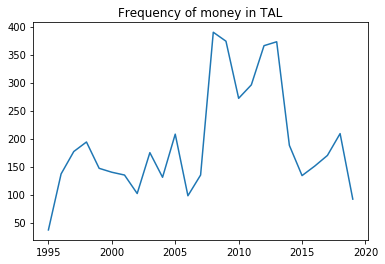

In [149]:
helper.plot_count(tal_df, tal_df['year'].unique(), 'money')

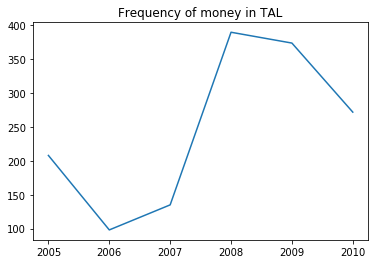

In [146]:
helper.plot_count(tal_df, before + after, 'money')

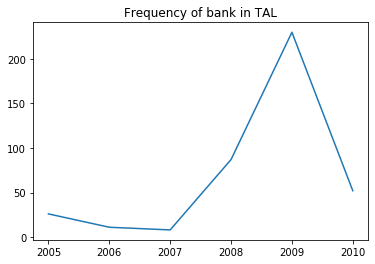

In [27]:
helper.plot_count(tal_df, before + after, 'bank')

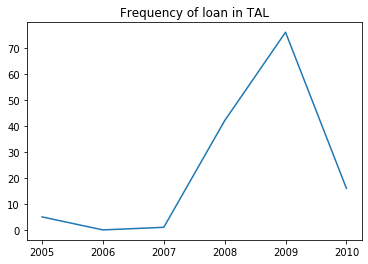

In [28]:
helper.plot_count(tal_df, before + after, 'loan')

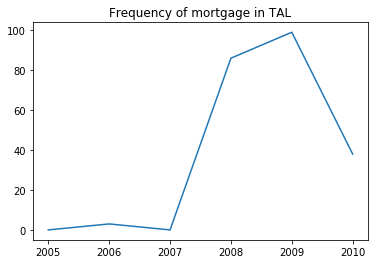

In [29]:
helper.plot_count(tal_df, before + after, 'mortgage')

## Most Common Adj

In [32]:
for year in by_year.keys():
    df = by_year[year]
    res = helper.most_common_adj(df, 'bank')
    print(year)
    print(res)
    print()

2005
{'storefront': 2}

2006
{}

2007
{}

2008
{'personal': 1, 'central': 2, 'small': 4, 'big': 2, 'Nigerian': 1, 'commercial': 1, 'major': 1, 'fashioned': 1, 'successful': 2}

2009
{'central': 2, 'overnight': 1, 'hypothetical': 1, 'complicated': 1, 'other': 2, 'large': 2, 'major': 2, 'big': 2, 'bad': 1, 'total': 1, 'many': 1, 'young': 1, 'entire': 1, 'small': 3, 'little': 1, 'anti': 1, 'federal': 1, 'expensive': 2, 'national': 1}

2010
{'great': 1, 'regional': 1, 'big': 1, 'triple': 1, 'local': 1, 'international': 1}



In [33]:
for year in by_year.keys():
    df = by_year[year]
    res = helper.most_common_adj(df, 'loan')
    print(year)
    print(res)
    print()

2005
{}

2006
{}

2007
{}

2008
{'official': 1}

2009
{'Average': 1, 'original': 1, 'assistant': 1, 'other': 1, 'big': 2, 'official': 1}

2010
{}



In [34]:
for year in by_year.keys():
    df = by_year[year]
    res = helper.most_common_adj(df, 'government')
    print(year)
    print(res)
    print()

2005
{'federal': 6, 'anti': 1, 'secret': 1, 'secular': 1, 'Christian': 3, 'civil': 1, 'American': 3, 'own': 3, 'special': 2, 'local': 2, 'navigate': 1, 'only': 1, 'Burmese': 1}

2006
{'federal': 4, 'new': 1, 'mock': 1}

2007
{'average': 1, 'Iraqi': 2, 'rational': 1, 'local': 1, 'communist': 1, 'new': 1, 'American': 1, 'secular': 1, 'Maliki': 1, 'British': 2, 'federal': 3}

2008
{'big': 2, 'federal': 7, 'unitary': 1, 'Canadian': 1, 'other': 1, 'own': 1}

2009
{'federal': 4, 'Only': 1, 'efficient': 1, 'own': 3, 'Colombian': 1, 'Vietnamese': 1, 'big': 1, 'top': 1, 'special': 2, 'American': 2, 'enough': 1}

2010
{'big': 1, 'Colombian': 1, 'special': 1, 'Barbadian': 1, 'Jamaican': 1, 'Czech': 1, 'different': 1, 'federal': 5, 'Iraqi': 11, 'central': 1, 'small': 1, 'huge': 1, 'British': 1}



In [35]:
for year in by_year.keys():
    df = by_year[year]
    res = helper.most_common_adj(df, 'money')
    print(year)
    print(res)
    print()

2005
{'extra': 4, 'enough': 9, 'decent': 1, 'good': 2, 'much': 10, 'federal': 3, 'big': 2, 'small': 2, 'precious': 1}

2006
{'little': 1, 'Good': 2, 'much': 4, 'decent': 1, 'enough': 2}

2007
{'big': 1, 'own': 3, 'enough': 2, 'decent': 1, 'much': 4, 'good': 1}

2008
{'much': 20, 'international': 1, 'enough': 5, 'new': 1, 'own': 1, 'equivalent': 1, 'good': 1, 'little': 3, 'real': 1, 'single': 1, 'extra': 2, 'other': 1, 'institutional': 1, 'possible': 2, 'Good': 2, 'same': 1}

2009
{'enough': 4, 'much': 19, 'own': 4, 'little': 2, 'extra': 4, 'big': 6, 'small': 2, 'decent': 1, 'new': 2, 'Good': 1, 'loose': 1, 'enormous': 2, 'spectacular': 1}

2010
{'big': 2, 'spectacular': 1, 'extra': 1, 'much': 10, 'easy': 1, 'foreign': 1, 'new': 1, 'bogus': 1, 'federal': 2, 'enough': 4, 'stimulus': 2, 'grant': 1, 'own': 2, 'quick': 1, 'good': 1}



In [112]:
for year in by_year.keys():
    df = by_year[year]
    res = helper.most_common_adj(df, 'crisis')
    print(year)
    print(res)
    print()

/Users/katykoeing/Desktop/computational-content-analysis/nlp-tal/source/helper_functions.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS_sents'] = df.apply(lambda x: tag_sents_pos(x['tokenized_sents']), axis=1)


2005
{'real': 3, 'social': 1}

2006
{}

2007
{'own': 1, 'existential': 1}

2008
{'prime': 1, 'whole': 3, 'financial': 10, 'recent': 1, 'economic': 4, 'global': 1, 'scary': 1, 'current': 1, 'bad': 2, 'subprime': 2}

2009
{'current': 2, 'regional': 1, 'global': 2, 'foreclosure': 1, 'economic': 2, 'real': 2, 'huge': 1, 'whole': 1, 'financial': 2}

2010
{'financial': 12, 'massive': 2, 'fiscal': 5, 'identical': 1, 'economic': 1}



## Word Networks

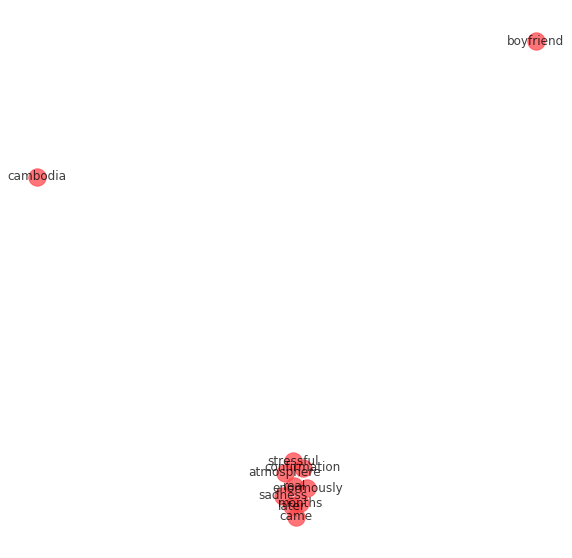

In [157]:
# crisis not in pre-financial crisis vocab
helper.graph_nx_word(before_df, 'no_lemma_normalized_sents', 1, 'crisis')

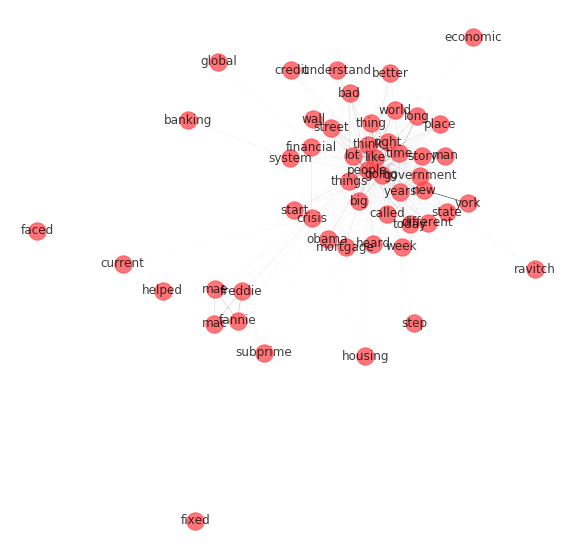

In [158]:
helper.graph_nx_word(after_df, 'no_lemma_normalized_sents', 5, 'crisis')

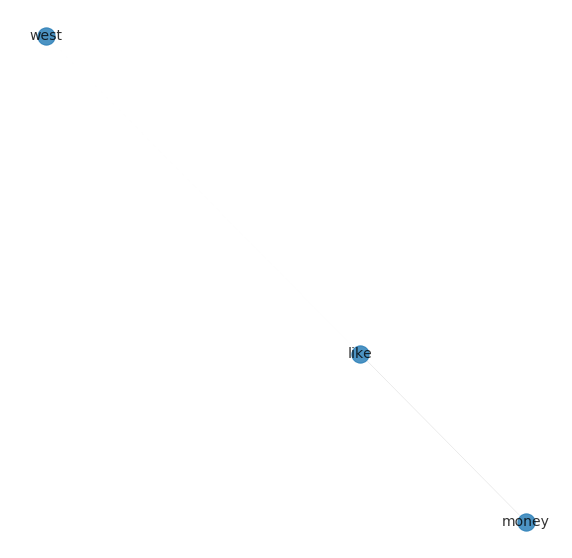

In [12]:
helper.graph_nx_word(before_df, 'no_lemma_normalized_sents', 5, 'bank')

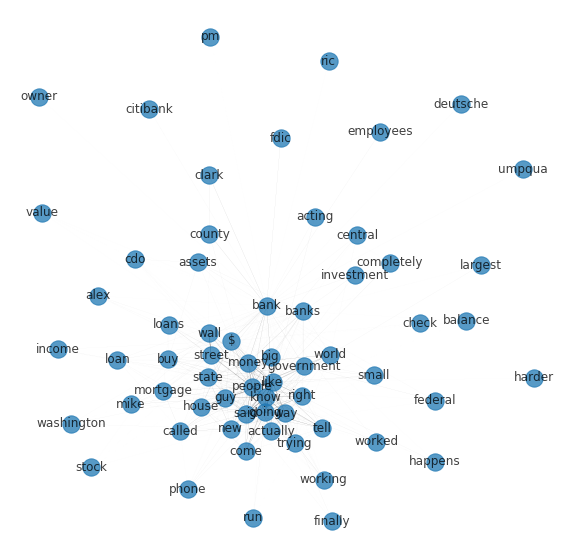

In [130]:
helper.graph_nx_word(after_df, 'no_lemma_normalized_sents', 7, 'bank')

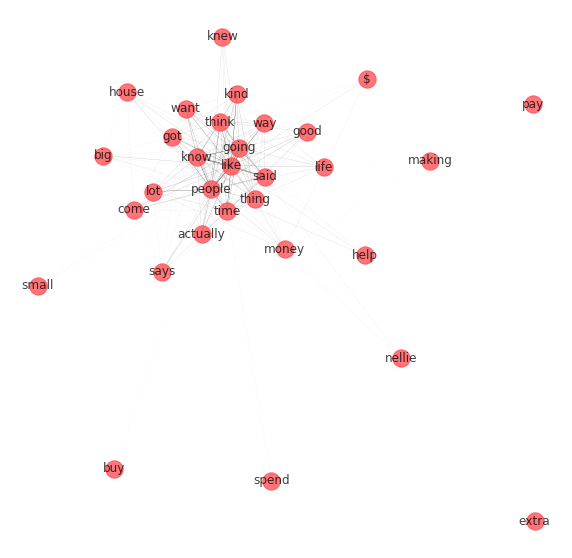

In [159]:
helper.graph_nx_word(before_df, 'no_lemma_normalized_sents', 10, 'money')

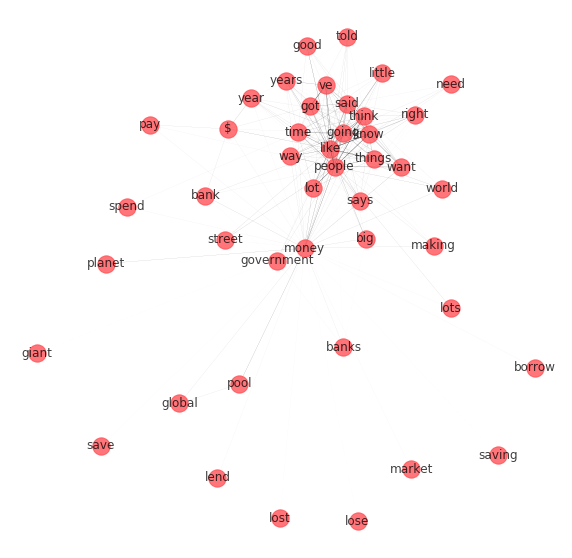

In [160]:
helper.graph_nx_word(after_df, 'no_lemma_normalized_sents', 20, 'money')

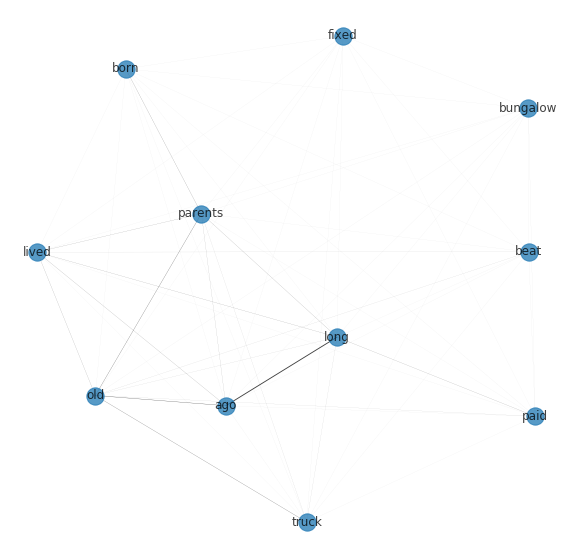

In [36]:
# mortgage not in this corpus
helper.graph_nx_word(before_df, 'no_lemma_normalized_sents', 1, 'mortgage')

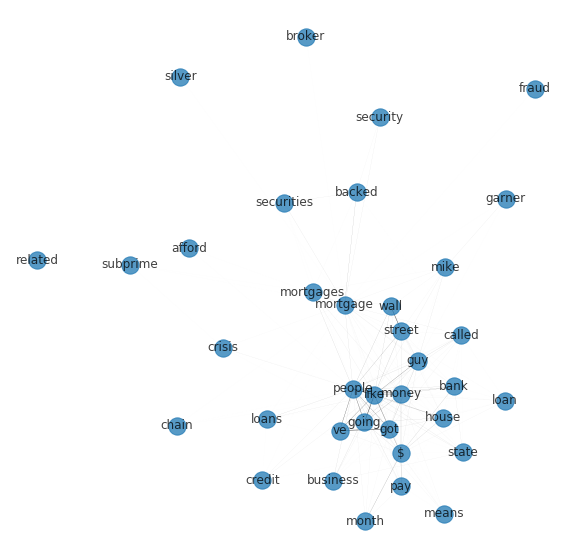

In [143]:
helper.graph_nx_word(after_df, 'no_lemma_normalized_sents', 8, 'mortgage')

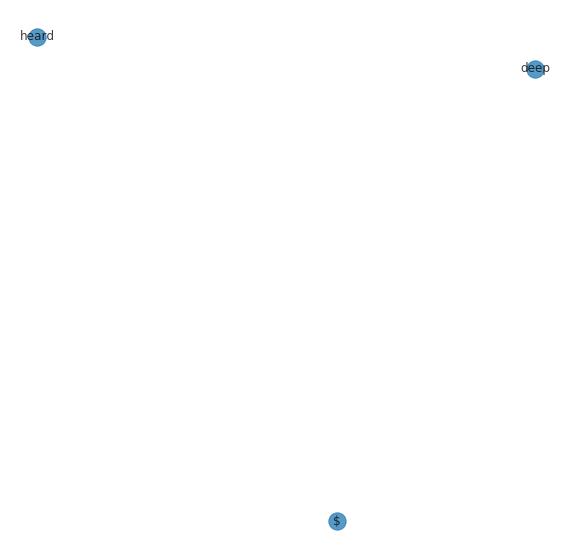

In [31]:
helper.graph_nx_word(before_df, 'no_lemma_normalized_sents', 1, 'debt')

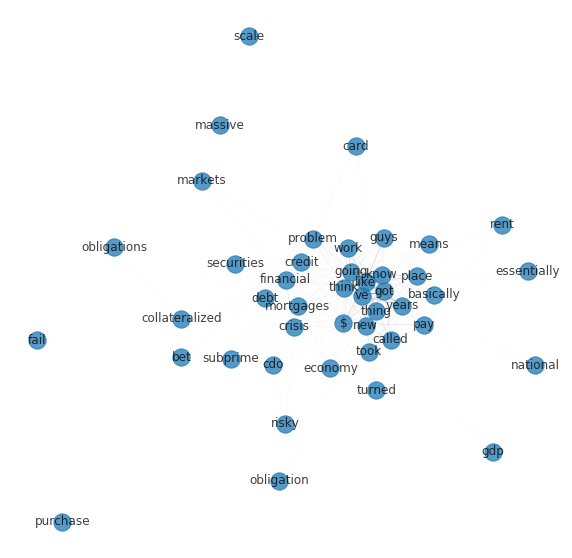

In [32]:
helper.graph_nx_word(after_df, 'no_lemma_normalized_sents', 1, 'debt')

## Embedding Bias

In [25]:
# create representative group 
# male
male = ['he', 'son', 'boys', 'boy', 'male', 'man', 'men', 'his', 'nephew',
        'nephews', 'brother', 'brothers', 'father', 'uncle', 'uncles', 'himself']
# female, from the Garg paper
female = ['she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl', 'herself',
          'female', 'females', 'sister', 'daughters', 'mothers',
          'women', 'girls', 'sisters', 'aunt', 'aunts', 'niece', 'nieces']
# rich
rich = ['rich', 'wealthy', 'wealth', 'expensive', 'affluent', 'affluence', 'afford']
# poor
poor = ['poor', 'cheap', 'poverty', 'broke']

In [26]:
# pre
talW2V = gensim.models.word2vec.Word2Vec(before_df['no_lemma_normalized_sents'].sum(), 
                                         size=1000)
male_vec = helper.mk_rep_group_vec(talW2V, male)
female_vec = helper.mk_rep_group_vec(talW2V, female)
rich_vec = helper.mk_rep_group_vec(talW2V, rich)
poor_vec = helper.mk_rep_group_vec(talW2V, poor)

In [27]:
# now try on post
talW2V01 = gensim.models.word2vec.Word2Vec(after_df['no_lemma_normalized_sents'].sum(),
                                           size=1000)
male_vec01 = helper.mk_rep_group_vec(talW2V01, male)
female_vec01 = helper.mk_rep_group_vec(talW2V01, female)
rich_vec01 = helper.mk_rep_group_vec(talW2V01, rich)
poor_vec01 = helper.mk_rep_group_vec(talW2V01, poor)

In [33]:
# neutral word list
liberal = ['liberal', 'progressive', 'democrat'] 
conservative = ['conservative', 'republican']
finance = ['save', 'savings', 'loan', 'debt', 'bank',
           'banking', 'mortgage', 'money']
anger = ['angry', 'mad', 'hate', 'anger', 'disgust']
fear = ['scared', 'fear', 'scary', 'afraid']
happy = ['happy', 'excited', 'enjoy', 'enjoying']
sad = ['sad', 'unhappy', 'tears']

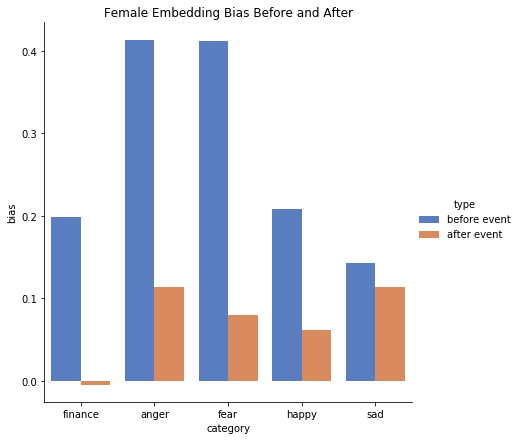

In [34]:
wordlist_dict = {'finance': finance, 'anger': anger,
                 'fear': fear, 'happy': happy, 'sad': sad}
pre_dict = {'model': talW2V, 'group_vec': female_vec,
            'compare_vec': male_vec}
post_dict = {'model': talW2V01, 'group_vec': female_vec01,
             'compare_vec': male_vec01}

helper.plot_bias(pre_dict, post_dict,
                 'Female Embedding Bias Before and After',
                 wordlist_dict)

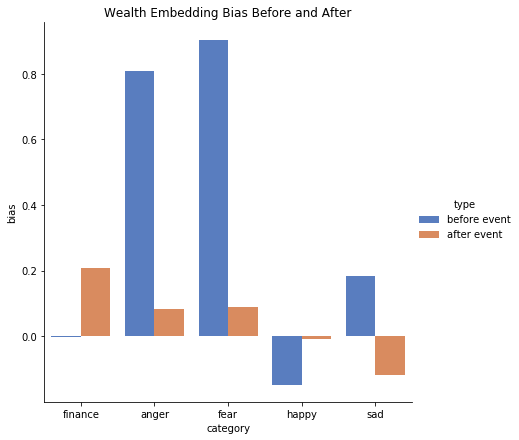

In [38]:
wordlist_dict = {'finance': finance, 'anger': anger,
                 'fear': fear, 'happy': happy, 'sad': sad}
pre_dict = {'model': talW2V, 'group_vec': poor_vec,
            'compare_vec': rich_vec}
post_dict = {'model': talW2V01, 'group_vec': poor_vec01,
             'compare_vec': rich_vec01}

helper.plot_bias(pre_dict, post_dict,
                 'Wealth Embedding Bias Before and After',
                 wordlist_dict)

## Most similar

In [114]:
most_similar_crisis = helper.agg_sim_words([talW2V, talW2V01], ['before crisis', 'after crisis'], word1 + word2)
most_similar_crisis.head()

,security,secure,money,financial,crisis,bank,debt,rate,bailout,government,...,housing,finances,love,america,american,country,safe,family,home,period
0,"[(government, 0.9999810457229614), (john, 0.99...","[(problem, 0.999737560749054), (knows, 0.99972...","[(asked, 0.9998542070388794), (says, 0.9998446...","[(quote, 0.9999390244483948), (english, 0.9999...","[(congress, 0.9998593330383301), (team, 0.9998...","[(team, 0.9999727606773376), (history, 0.99997...","[(straight, 0.9998313188552856), (box, 0.99983...","[(trial, 0.9998042583465576), (area, 0.9998041...",NA,"[(security, 0.9999810457229614), (survey, 0.99...",...,"[(schools, 0.9999614953994751), (host, 0.99988...",NA,"[(hear, 0.9998795986175537), (snowman, 0.99987...","[(houses, 0.9999626278877258), (jobs, 0.999961...","[(distributed, 0.9986491799354553), (life, 0.9...","[(army, 0.9999700784683228), (iraqi, 0.9999480...","[(immediately, 0.9999719262123108), (store, 0....","[(saw, 0.9998881220817566), (friends, 0.999880...","[(mom, 0.9998267889022827), (away, 0.999794125...",before crisis
1,"[(housing, 0.9999436140060425), (biggest, 0.99...","[(dog, 0.9997067451477051), (sophie, 0.9997044...","[(pay, 0.9948440790176392), (house, 0.99439734...","[(insurance, 0.9997997283935547), (manager, 0....","[(attorney, 0.9997724294662476), (agency, 0.99...","[(pool, 0.9979780912399292), (borrow, 0.997894...","[(asset, 0.9999359846115112), (broker, 0.99993...","[(fancy, 0.9999492168426514), (won, 0.99994146...","[(selling, 0.9996641874313354), (risky, 0.9996...","[(company, 0.9993386268615723), (office, 0.998...",...,"[(security, 0.9999436140060425), (east, 0.9999...","[(center, 0.9997197389602661), (bankruptcy, 0....","[(real, 0.9997302889823914), (true, 0.99972081...","[(secretary, 0.99996018409729), (non, 0.999957...","[(oversight, 0.996796727180481), (radio, 0.996...","[(website, 0.9999153017997742), (written, 0.99...","[(avoid, 0.9999639391899109), (control, 0.9999...","[(past, 0.9998601675033569), (worked, 0.999857...","[(away, 0.9987845420837402), (long, 0.99839752...",after crisis


In [115]:
most_similar_crisis.to_csv('crisis_modst_similar.csv', index=False)

In [ ]:
# how to make this readable? how to visualize?

## Plot Dimensions

In [47]:
# dimensions
Gender = helper.dimension(talW2V, ['man','guy', 'male'],
                          ['woman', 'girl', 'female'])
Race = helper.dimension(talW2V, ['black', 'brown', 'minority'],
                        ['white'])
Class = helper.dimension(talW2V, ['rich', 'expensive', 'wealth'],
                         ['poor', 'cheap', 'poor'])

Morality = helper.dimension(talW2V, ['good', 'good', 'honest','pure'], 
                     ['bad', 'evil','lie','dirty'])

Education = helper.dimension(talW2V, ['educated','smart'], 
                             ['dumb','stupid'])
dim_dict = {'gender': Gender, 'race': Race, 'class': Class,
            'morality': Morality, 'education': Education}

In [56]:
# word lists
emotions = ['happy', 'sad', 'excited','fear', 'lonely', 'ashamed', 'shame', 
            'embarrassed', 'hate', 'love', 'anger', 'upset',
            'tired', 'lazy', 'hope']

opinions = ['believe', 'belief', 'perspective', 'opinion',
            'thought', 'think', 'attitude']

self = ['self', 'appearance', 'looks', 'confidence', 'gay',
        'black', 'white', 'american']

rel = ['single', 'divorce', 'divorced', 'family', 'brother',
       'sister', 'children', 'aunt', 'uncle',
       'child', 'wedding', 'married', 'marriage', 'boyfriend',
       'girlfriend', 'partner', 'love']

In [66]:
emotions = ['scared', 'secure', 'nervous', 'hopeful', 'security']
Emodf = helper.makeDF(talW2V, emotions, dim_dict)
Opdf = helper.makeDF(talW2V, opinions, dim_dict)
Selfdf = helper.makeDF(talW2V, self, dim_dict)
Reldf = helper.makeDF(talW2V, rel, dim_dict)

Emotions


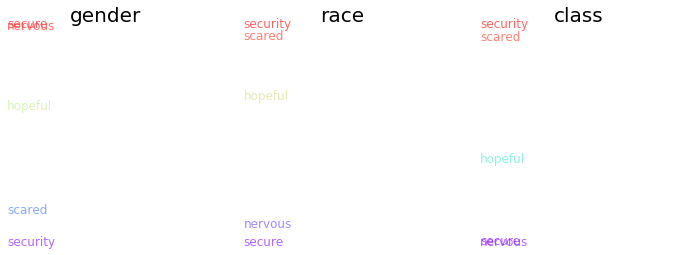

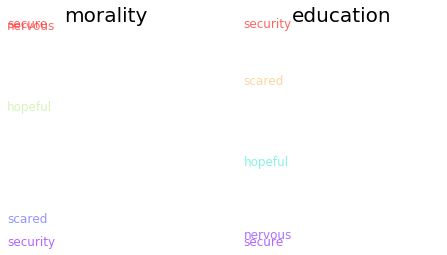

In [67]:
# Pre
# display words on dimensions
print('Emotions')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
helper.PlotDimension(ax1, Emodf, 'gender')
ax2 = fig.add_subplot(132)
helper.PlotDimension(ax2, Emodf, 'race')
ax3 = fig.add_subplot(133)
helper.PlotDimension(ax3, Emodf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
helper.PlotDimension(ax1, Emodf, 'morality')
ax2 = fig.add_subplot(132)
helper.PlotDimension(ax2, Emodf, 'education')
plt.show()

In [59]:
# post dimensions
Gender01 = helper.dimension(talW2V01, ['man','guy', 'male','brother','father', 'son'], 
                            ['woman', 'girl', 'female','sister', 'mother','daughter'])
Race01 = helper.dimension(talW2V01, ['black','blacks', 'brown'],
                          ['white', 'whites'])
Class01 = helper.dimension(talW2V01, ['rich', 'expensive', 'wealthy'],
                           ['poor', 'cheap', 'poor'])

Morality01 = helper.dimension(talW2V01, ['good', 'good', 'honest','pure'], 
                     ['bad', 'evil','lie','dirty'])

Education01 = helper.dimension(talW2V01, ['educated', 'smart', 'college'], 
                              ['dumb', 'stupid'])
dim_dict01 = {'gender': Gender01, 'race': Race01, 'class': Class01,
              'morality': Morality01, 'education':  Education01}

Emotions


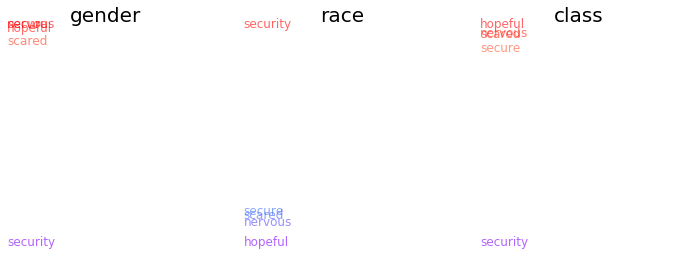

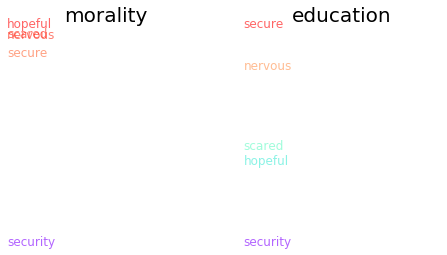

In [68]:
# emotions = ['happy', 'sad', 'excited','fear', 'lonely', 'ashamed', 'shame', 
#             'embarrassed', 'hate', 'love', 'anger', 'upset', 'tired', 'lazy', 'hope']
# same emotions as above
Emodf = helper.makeDF(talW2V01, emotions, dim_dict01)
Opdf = helper.makeDF(talW2V01, opinions, dim_dict01)
Selfdf = helper.makeDF(talW2V01, self, dim_dict01)
Reldf = helper.makeDF(talW2V01, rel, dim_dict01)


print('Emotions')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
helper.PlotDimension(ax1, Emodf, 'gender')
ax2 = fig.add_subplot(132)
helper.PlotDimension(ax2, Emodf, 'race')
ax3 = fig.add_subplot(133)
helper.PlotDimension(ax3, Emodf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
helper.PlotDimension(ax1, Emodf, 'morality')
ax2 = fig.add_subplot(132)
helper.PlotDimension(ax2, Emodf, 'education')
plt.show()